# Data preprocessing

In [2]:
! pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 675.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 3.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 13.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   --------------------------------------- 269.5/269.5 kB 16.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00


In [3]:
# Import necessary libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# nltk.download('wordnet')

In [4]:
pwd = os.getcwd()

In [5]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', ' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z0-9\s!?.,]", '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
   
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    text = ' '.join(tokens)
    return text

In [8]:
df_train = pd.read_csv(r"C:\Users\cragh\Downloads\final_dataset_train.csv")

In [9]:
df_train

,movie_id,movie_rating,review,label
0,tt0064354,3,Story of a man who has unnatural feelings for ...,bad
1,tt0100680,1,Robert DeNiro plays the most unbelievably inte...,bad
2,tt0100680,1,"I saw the capsule comment said ""great acting.""...",bad
3,tt0100680,4,If I had not read Pat Barker's 'Union Street' ...,bad
4,tt0047200,4,This fanciful horror flick has Vincent Price p...,bad
...,...,...,...,...
24995,tt0433360,7,What's Good About It: Some inventive and genui...,good
24996,tt0433360,8,For years we've been watching every horror fil...,good
24997,tt0324532,10,If you haven't already seen this movie of Mary...,good
24998,tt0324532,10,this movie is the best movie ever it has a lot...,good


In [65]:
# Download the punkt tokenizer for sentence splitting
nltk.download('punkt')

# Download the stopwords dataset
nltk.download('stopwords')

# Download the wordnet resource
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
# Use the created function to apply preprocessing techniques on the reviews
df_train['review'] = df_train['review'].apply(preprocess_text)

KeyboardInterrupt: 

In [67]:
df_train.head()

,movie_id,movie_rating,review,label,review_length,unique_word_count
0,tt0064354,3,story man unnatural feeling pig . start openin...,0,475,62
1,tt0100680,1,robert deniro play unbelievably intelligent il...,0,508,61
2,tt0100680,1,saw capsule comment said great acting . opinio...,0,528,66
3,tt0100680,4,"read pat barker union street seeing film , wou...",0,1242,136
4,tt0047200,4,fanciful horror flick vincent price playing ma...,0,309,43


In [ ]:
#Encode the table
label = {'bad':0, 'good':1}
df_train['label'] = df_train['label'].map(label)

In [ ]:
df_train

,movie_id,movie_rating,review,label
0,tt0064354,3,story man unnatural feeling pig . start openin...,0
1,tt0100680,1,robert deniro play unbelievably intelligent il...,0
2,tt0100680,1,saw capsule comment said great acting . opinio...,0
3,tt0100680,4,"read pat barker union street seeing film , wou...",0
4,tt0047200,4,fanciful horror flick vincent price playing ma...,0
...,...,...,...,...
24995,tt0433360,7,whats good inventive genuinely creepy little e...,1
24996,tt0433360,8,"year weve watching every horror film come , du...",1
24997,tt0324532,10,"havent already seen movie marykate ashleys , s...",1
24998,tt0324532,10,movie best movie ever lot live action great ev...,1


In [ ]:

df_train.to_csv('preprocessed_train.csv', index=False)

In [ ]:
df_train.head()

,movie_id,movie_rating,review,label
0,tt0064354,3,story man unnatural feeling pig . start openin...,0
1,tt0100680,1,robert deniro play unbelievably intelligent il...,0
2,tt0100680,1,saw capsule comment said great acting . opinio...,0
3,tt0100680,4,"read pat barker union street seeing film , wou...",0
4,tt0047200,4,fanciful horror flick vincent price playing ma...,0


In [68]:
# Load positive and negative test data
df_test_pos = pd.read_csv('test_pos.csv')
df_test_neg = pd.read_csv('test_neg.csv')

# Combine into a single DataFrame
df_test = pd.concat([df_test_pos, df_test_neg], ignore_index=True)

In [69]:
df_test

,review,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
...,...,...
24995,I occasionally let my kids watch this garbage ...,0
24996,When all we have anymore is pretty much realit...,0
24997,The basic genre is a thriller intercut with an...,0
24998,Four things intrigued me as to this film - fir...,0


In [70]:
# Use the created function to apply preprocessing techniques on the reviews
df_test['review'] = df_test['review'].apply(preprocess_text)

In [73]:
df_test.head()

,review,label
0,went saw movie last night coaxed friend mine ....,1
1,actor turned director bill paxton follows prom...,1
2,"recreational golfer knowledge sport history , ...",1
3,"saw film sneak preview , delightful . cinemato...",1
4,bill paxton taken true story 1913 u golf open ...,1


## Explonatory Data Analysis

In [ ]:
#Data Overview
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      25000 non-null  object
 1   movie_rating  25000 non-null  int64 
 2   review        25000 non-null  object
 3   label         25000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 781.4+ KB
None


In [ ]:
#Summary Statistics
print(df_train.describe())

       movie_rating        label
count  25000.000000  25000.00000
mean       5.477720      0.50000
std        3.466477      0.50001
min        1.000000      0.00000
25%        2.000000      0.00000
50%        5.500000      0.50000
75%        9.000000      1.00000
max       10.000000      1.00000


In [ ]:
# Checking for null values on the train dataset

df_train.isnull().sum()

movie_id        0
movie_rating    0
review          0
label           0
dtype: int64

<Axes: xlabel='movie_rating'>

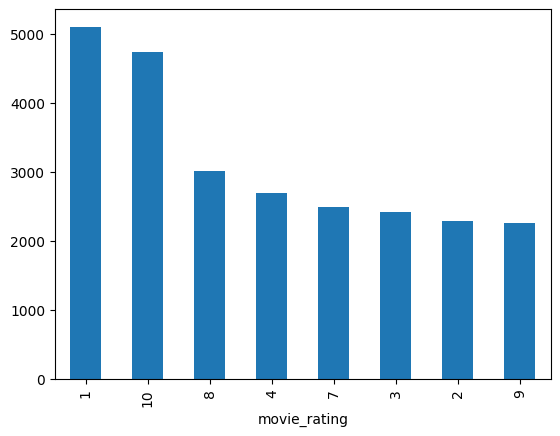

In [ ]:
df_train['movie_rating'].value_counts().plot(kind = 'bar')

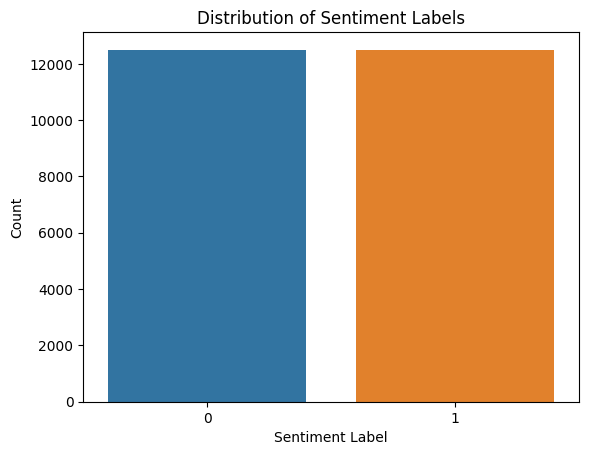

In [ ]:
# Distribution of sentiment labels(0 or 1)
# We have approximately 12,000 reviews labeled as both positive (1) and negative (0)
sns.countplot(data=df_train, x='label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

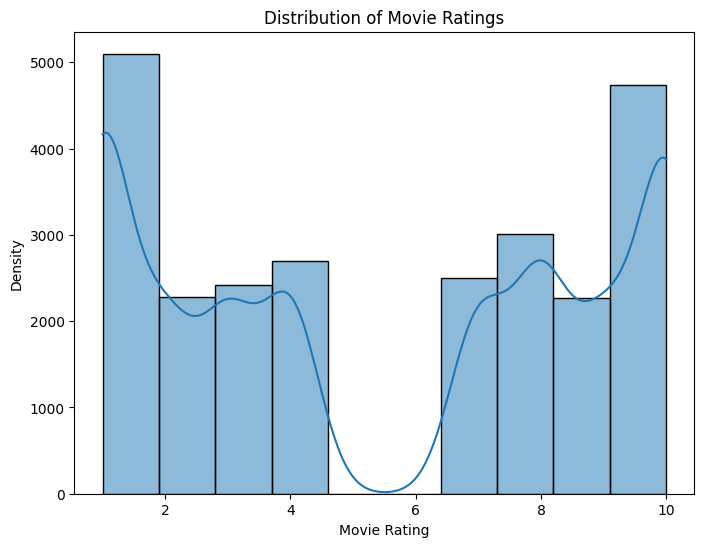

In [ ]:
#Movie Rating Distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='movie_rating', bins=10, kde=True)
plt.xlabel('Movie Rating')
plt.ylabel('Density')
plt.title('Distribution of Movie Ratings')
plt.show()

The graph shows the distribution of movie ratings, ranging from 0 to 10.
Around rating 0: Many movies received extremely low ratings.
Around rating 10: Many movies received exceptionally high ratings.
There is a noticeable dip in density around ratings 5-6, suggesting fewer movies received average scores.
Overall, movies tend to receive either very positive or very negative ratings, with fewer falling in the middle range.

In [ ]:
! pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00


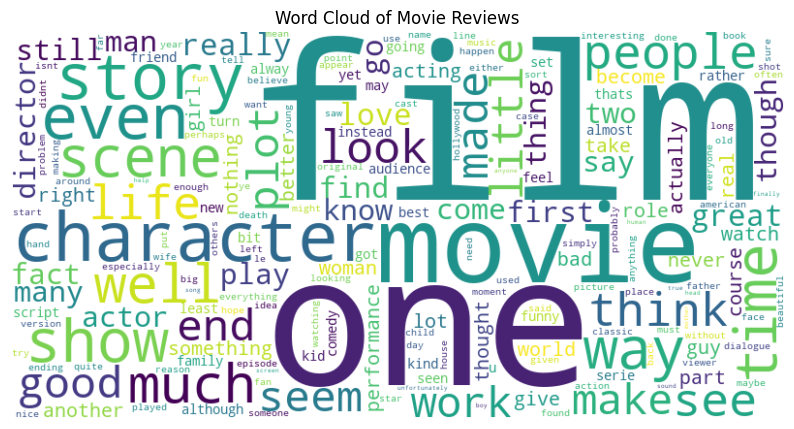

In [ ]:
#Word Cloud for Reviews:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df_train['review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

The larger and bolder words in the cloud are the most frequently mentioned terms in the reviews.“film” and “movie”: These terms are central, indicating that they appear frequently in the reviews.
“time”: Suggests discussions about the duration or pacing of movies.
“story”: Likely related to plot and narrative.
“character”: Refers to the portrayal of individuals in the films.
Other smaller words may represent specific themes, genres, or emotions associated with the reviews.


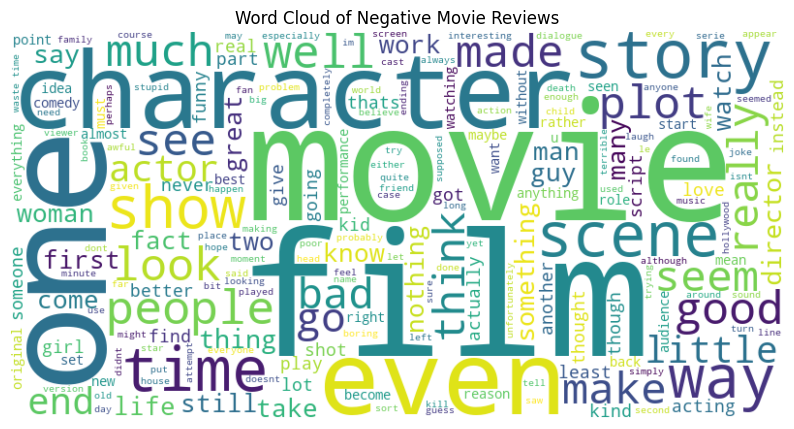

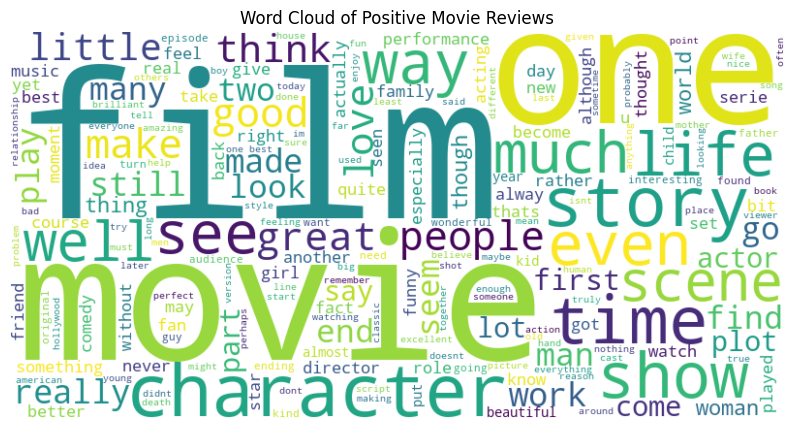

In [ ]:

# Combine all negative reviews into a single string
negative_reviews = ' '.join(df_train[df_train['label'] == 0]['review'])

# Generate word cloud for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Movie Reviews')
plt.show()

# Combine all positive reviews into a single string
positive_reviews = ' '.join(df_train[df_train['label'] == 1]['review'])

# Generate word cloud for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Movie Reviews')
plt.show()


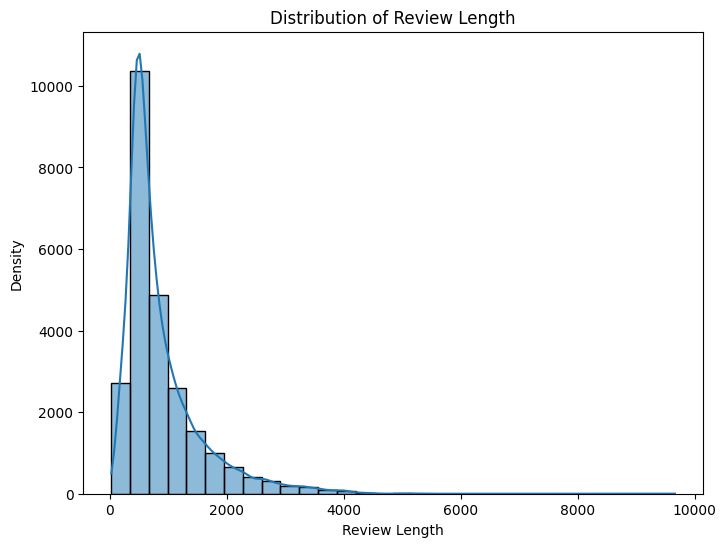

In [ ]:
#Review Length
df_train['review_length'] = df_train['review'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='review_length', bins=30, kde=True)
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.title('Distribution of Review Length')
plt.show()


Most reviews are short in length, as indicated by the peak in density near the beginning of the x-axis.
As review length increases, the density sharply declines, suggesting that fewer reviews are longer.

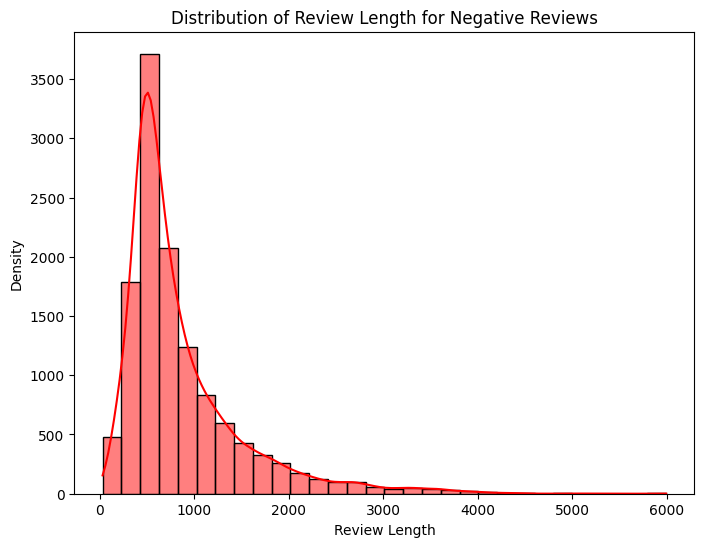

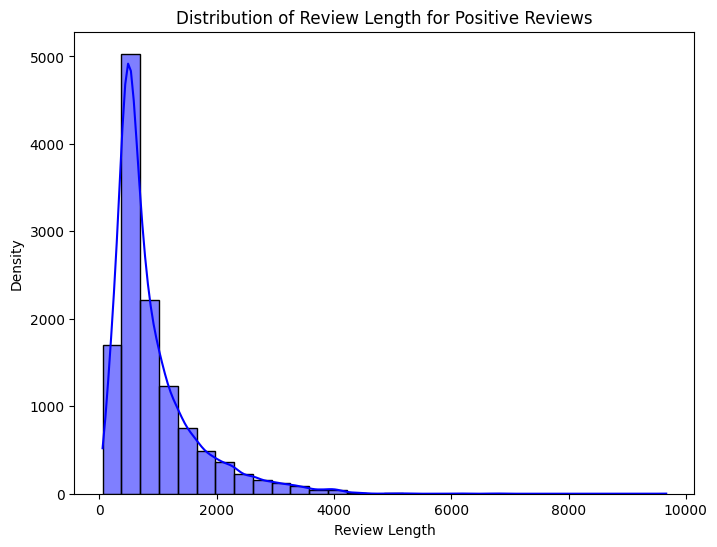

In [ ]:
#Review Length
# Histogram for Negative Reviews
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train[df_train['label'] == 0], x='review_length', bins=30, kde=True, color='red')
plt.title('Distribution of Review Length for Negative Reviews')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()

# Histogram for Positive Reviews
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train[df_train['label'] == 1], x='review_length', bins=30, kde=True, color='blue')
plt.title('Distribution of Review Length for Positive Reviews')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()


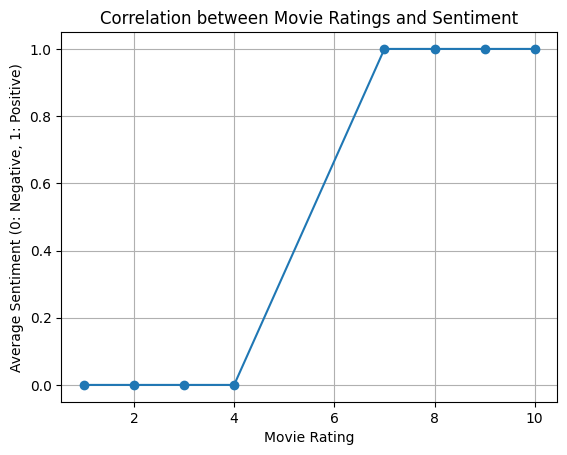

In [ ]:
# Calculate the average sentiment label for each movie rating
avg_sentiment = df_train.groupby('movie_rating')['label'].mean()

# Plot the correlation between movie ratings and sentiment
plt.plot(avg_sentiment.index, avg_sentiment.values, marker='o')
plt.xlabel('Movie Rating')
plt.ylabel('Average Sentiment (0: Negative, 1: Positive)')
plt.title('Correlation between Movie Ratings and Sentiment')
plt.grid()
plt.show()

At movie rating 2, the average sentiment is around 0.2 (closer to negative).
At movie rating 4, the average sentiment is around 0.4 (still leaning negative).
As we move to higher ratings, the average sentiment increases.A blue line connects the data points.
The upward trend of the line indicates a positive correlation between movie ratings and sentiment.
In other words, as movie ratings increase, the average sentiment becomes more positive.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 10 words in negative reviews
negative_reviews = df_train[df_train['label'] == 0]['review']
top_words_negative = get_top_n_words(negative_reviews, 20)

# Top 10 words in positive reviews
positive_reviews = df_train[df_train['label'] == 1]['review']
top_words_positive = get_top_n_words(positive_reviews, 20)

print("Top 10 words in negative reviews:", top_words_negative)
print("Top 10 words in positive reviews:", top_words_positive)

Top 10 words in negative reviews: [('movie', 28583), ('film', 21898), ('one', 13155), ('like', 11198), ('even', 7651), ('time', 7389), ('good', 7296), ('bad', 7266), ('character', 7058), ('would', 6854), ('get', 6727), ('make', 6364), ('really', 6252), ('see', 5603), ('story', 5583), ('scene', 5526), ('dont', 5212), ('much', 5043), ('people', 4822), ('thing', 4686)]
Top 10 words in positive reviews: [('film', 24400), ('movie', 22384), ('one', 13873), ('like', 9021), ('time', 8028), ('good', 7571), ('story', 7356), ('character', 6986), ('great', 6401), ('see', 6250), ('well', 5893), ('get', 5733), ('make', 5572), ('also', 5545), ('really', 5470), ('would', 5293), ('even', 4928), ('scene', 4928), ('life', 4868), ('show', 4835)]


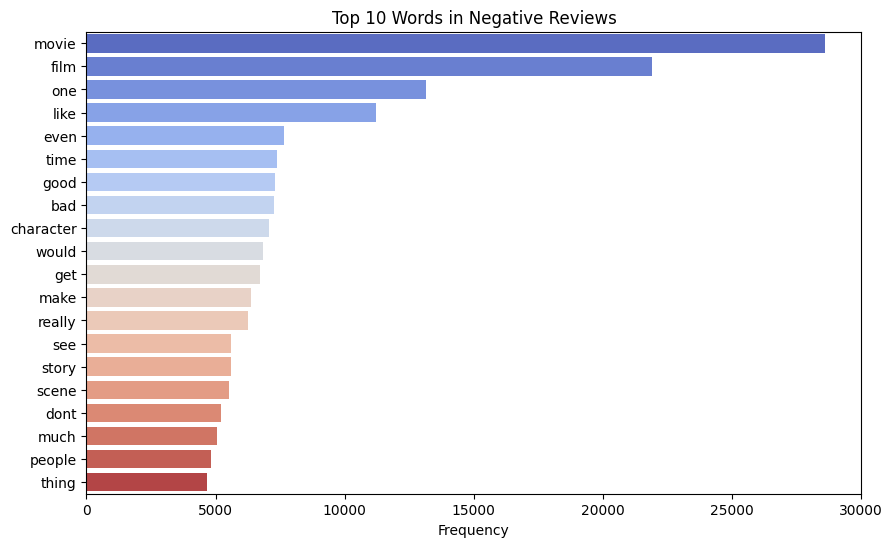

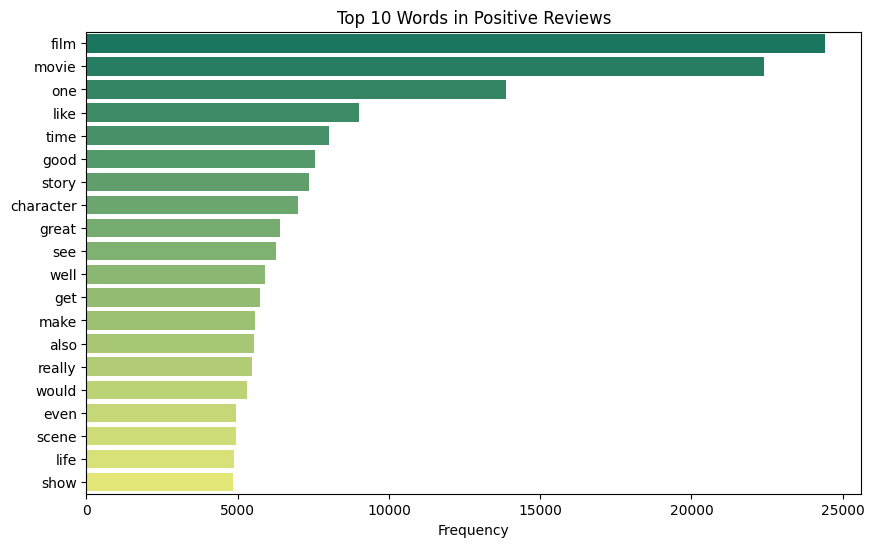

In [ ]:
# Convert the list of tuples into a DataFrame for negative reviews
df_neg = pd.DataFrame(top_words_negative, columns=['Word', 'Frequency'])

# Plot for Negative Reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_neg, palette='coolwarm')
plt.title('Top 10 Words in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

# Convert the list of tuples into a DataFrame for positive reviews
df_pos = pd.DataFrame(top_words_positive, columns=['Word', 'Frequency'])

# Plot for Positive Reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_pos, palette='summer')
plt.title('Top 10 Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

## Vectorization

**Binary Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def prepare_data(train_data, test_data, column_name='review'):
    # Preprocess text data
    train_data[column_name] = train_data[column_name].apply(preprocess_text)
    test_data[column_name] = test_data[column_name].apply(preprocess_text)
    
    # Initialize the CountVectorizer with binary=True for binary vectorization
    vectorizer = CountVectorizer(binary=True)
    
    # Fit and transform the training data
    X_train = vectorizer.fit_transform(train_data[column_name])
    
    # Transform the test data
    X_test = vectorizer.transform(test_data[column_name])
    
    return X_train, train_data['label'], X_test, test_data['label'], vectorizer


## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Initialize the logistic regression model
    model = LogisticRegression(penalty='l2', solver='lbfgs', tol=1e-4, max_iter=100, C=1)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return model


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate_with_grid_search(X_train, y_train, X_test, y_test):
    # Initialize the logistic regression model
    model = LogisticRegression(penalty='l2', solver='lbfgs', tol=1e-4, max_iter=100)
    
    # Define the grid of parameters to search over
    param_grid = {'C': [0.01, 0.05, 0.25, 0.5, 1]}
    
    # Setup the grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    
    # Perform the grid search by fitting models with different parameters
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters found by GridSearchCV
    print(f"Best parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    
    # Use the best model to make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return best_model

In [104]:
# Prepare the data
X_train, y_train, X_test, y_test, vectorizer = prepare_data(df_train, df_test)

# Train the model and evaluate it
model = train_and_evaluate(X_train, y_train, X_test, y_test)


Test Accuracy: 0.87212
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12500
           1       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



C:\Users\cragh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [107]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
def display_confusion_matrix_and_metrics(true_labels, predicted_labels):

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Visualization of the confusion matrix using a heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['Bad','Good'],
                yticklabels=['Bad','Good'])
    plt.title(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Printing classification report for further insights
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

In [108]:
def plot_roc_auc_curve(true_labels, probabilities):

    # Calculate the ROC curve points
    false_positive_rate, true_positive_rate, _ = roc_curve(true_labels, probabilities)

    # Calculate the AUC score
    auc_score = roc_auc_score(true_labels, probabilities)

    # Plot the ROC curve
    plt.figure(figsize=(16, 9))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline (No Skill)')
    plt.plot(false_positive_rate, true_positive_rate, marker='.', label=f'Model (AUC = {auc_score:.3f})')

    # Configure plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and AUC Score')
    plt.legend()
    plt.show()

In [109]:
# Predict on training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [110]:
print(f'Recall Score: {recall_score(y_train, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train, train_predictions):.4f}')

Recall Score: 0.9978
Precision Score: 0.9970
F1 Score: 0.9974
Accuracy Score: 0.9974
AUC Score: 0.9974


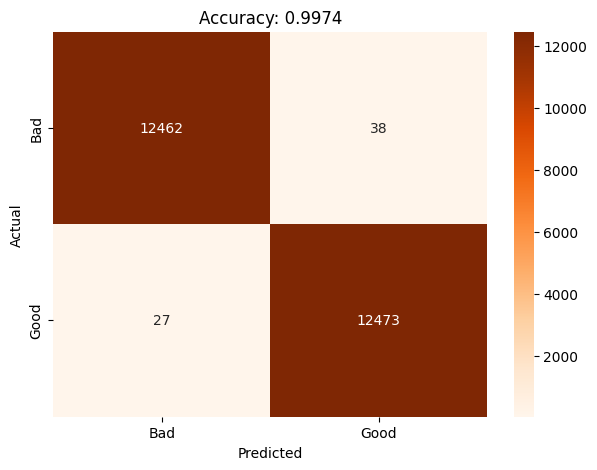


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [100]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train, train_predictions)

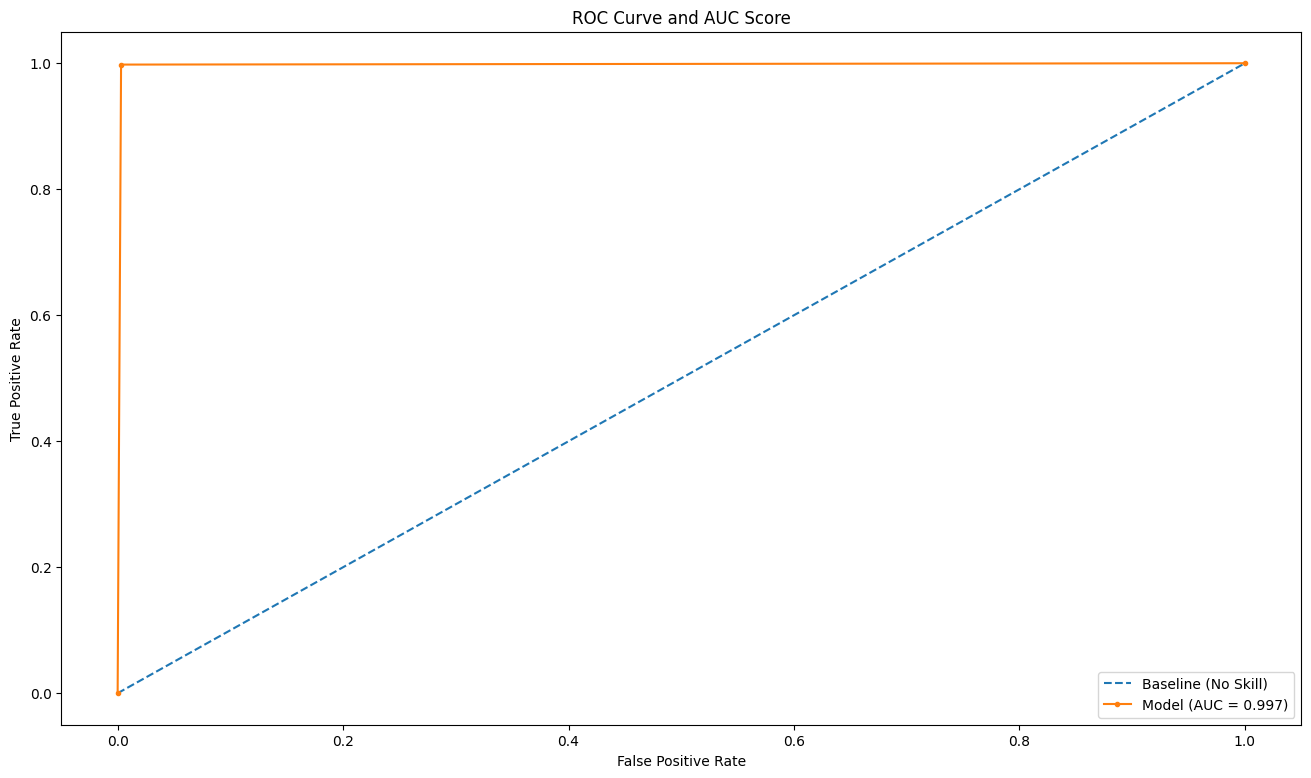

In [101]:
from sklearn.metrics import roc_curve
plot_roc_auc_curve(y_train, train_predictions)

In [103]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8686
Precision Score: 0.8748
F1 Score: 0.8717
Accuracy Score: 0.8721
AUC Score: 0.8721


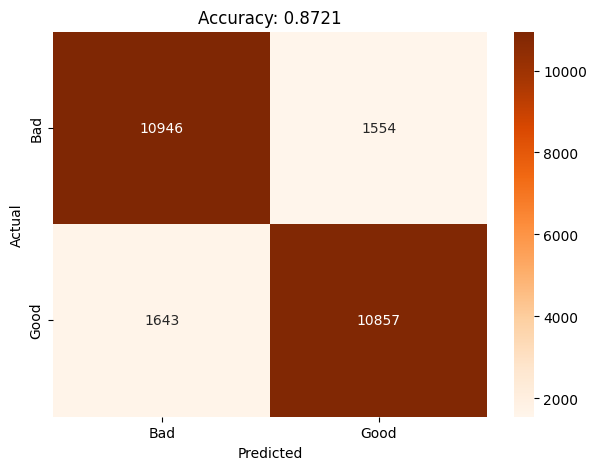


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12500
           1       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [102]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

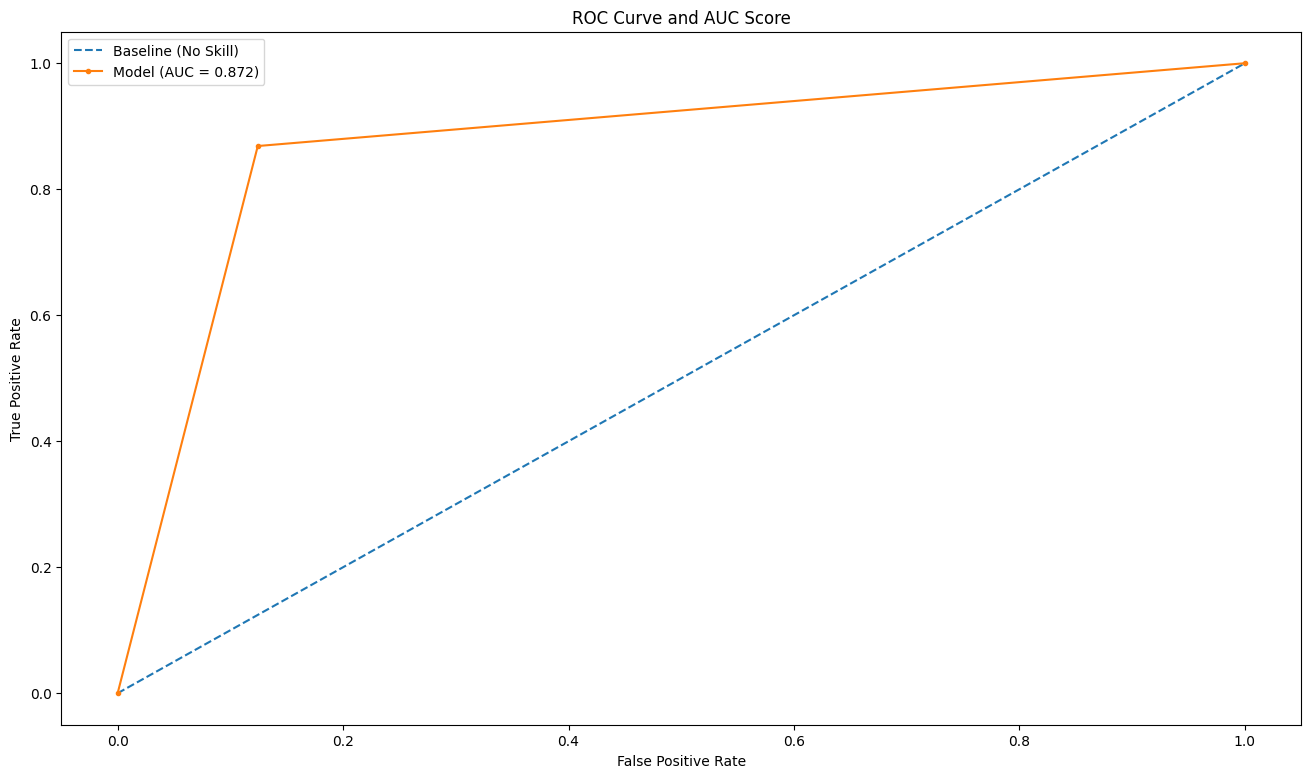

In [112]:
plot_roc_auc_curve(y_test, test_predictions)